# CIFAR 10 Image Classification

*Abstract*: To build high performance self-driving system, one must first develop a successful machine learning pipeline to recognize objects. In this project, you will be using CIFAR 10 dataset. CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute (this project uses CIFAR-10). The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below: 

Class Index | Class label
--- | ---
`**0**` | **airplane**
`**1**` | **automobile**
`**2**` | **bird**
`**3**` | **cat**
`**4**` | **deer**
`**5**` | **dog**
`**6**` | **frog**
`**7**` | **horse**
`**8**` | **ship**
`**9**` | **truck**

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

- Algorithms: Deep Convolutional Neural Network, Deep Recurrent Neural Network

- Difficulty: Challenging. The dataset can be used directly. In addition, if teams have other demands, more complex data processing procedure can be developed to produce high accuracy

## Captone Project Link

Links to Capstone Project slides: [here](https://docs.google.com/presentation/d/1iEMLMUSAA-lEe4EzC0sCbiu405Bow7-4zGIj3SKN-1c/edit#slide=id.g107242abc6f_0_12)

## Motivation

Image classification using deep learning has become very popular, and seems to be one of the best methods. Images with more features (and higher resolution) require more sophisticated networks that are able to consider the translation invariance of features, and other important aspects of image classification.

This project was meant to give an insight and understanding of how convolutional neural networks work, different methods for improving a model (batch normalization, data augmentation etc.) and the evaluation of complex models.



## Load Data

In [ ]:
# example of loading the cifar10 dataset
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.datasets import cifar10

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## Define Research Question

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Examples:

- You can count the number of classes in this data. 
- You examine the images according to class labels. 
- You can plot the averages of pixel-level values across all images in a particular class. In addition, you can also span the visualization for all classes.

You can refer to more resources here in this [code](https://colab.research.google.com/drive/1KkG1V7RsnKjCRd0zx0h434nqiXwOf-fG?authuser=1).

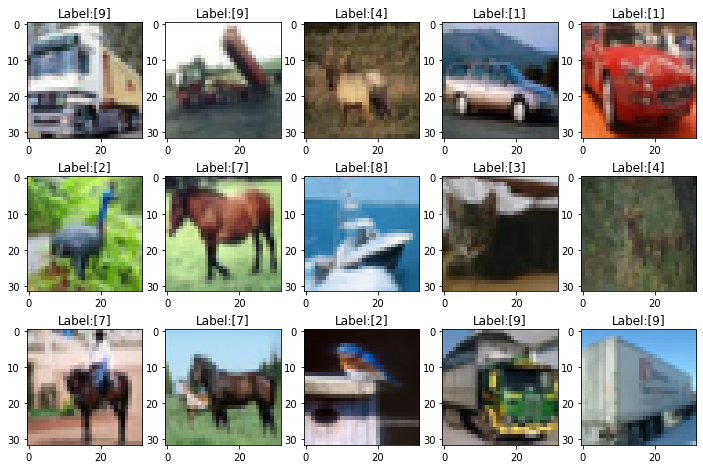

In [ ]:
# grid of rows by columns
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = trainX[i] # get an image, defined as "img"
    fig.add_subplot(rows, columns, i) # create subplot (row index, col index, which number of plot)
    plt.title("Label:" + str(trainy[i]))
    plt.imshow(img, cmap='binary') # greyscale
plt.show()

In [ ]:
# for which_class in range(0, 10):
#     for XXX:
#         # print pictures for that one class

0
1
2
3
4
5
6
7
8
9


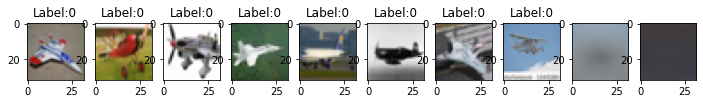

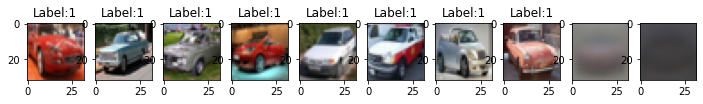

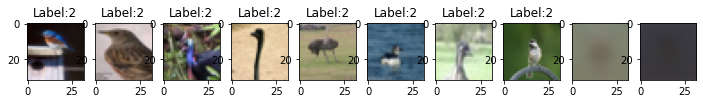

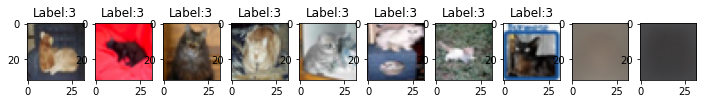

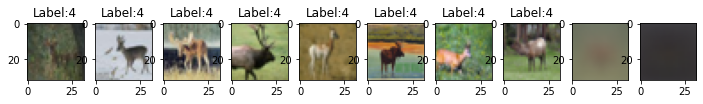

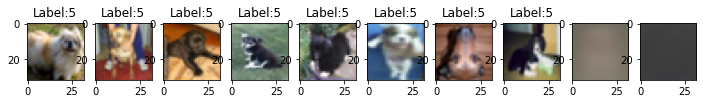

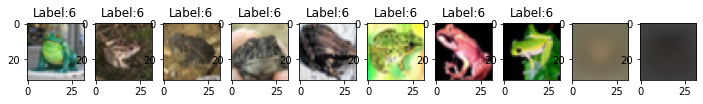

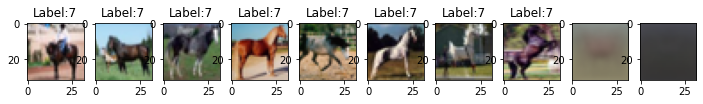

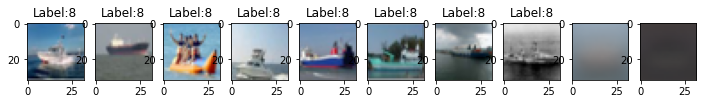

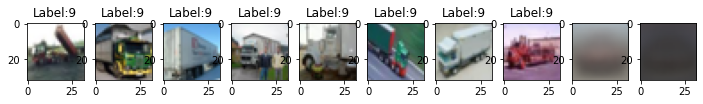

In [ ]:
# grid of rows by columns
columns = 10
rows = 1
for which_class in range(0,10):
  training_images_class = trainX[(trainy == which_class).reshape(-1),:,:,:]
  fig = plt.figure(figsize=(12, 8))
  # up to this line, we are only looking at one class: which_class
  for i in range(1, columns-1):
      img = training_images_class[i] # get an image, defined as "img"
      fig.add_subplot(rows, columns, i) # create subplot (row index, col index, which number of plot)
      plt.title("Label:" + str(which_class))
      plt.imshow(img, cmap='binary')

#   fig.add_subplot(rows, columns, columns-1)
#   img = training_images_class.mean(axis=0)
#   img = np.round(img)
#   img = img.astype(int)
#   plt.imshow(img)

#   fig.add_subplot(rows, columns, columns)
#   img = training_images_class.std(axis=0)
#   img = np.round(img)
#   img = img.astype(int)
#   plt.imshow(img)

  plt.show()

We can add the pixel-labeled visualization here!

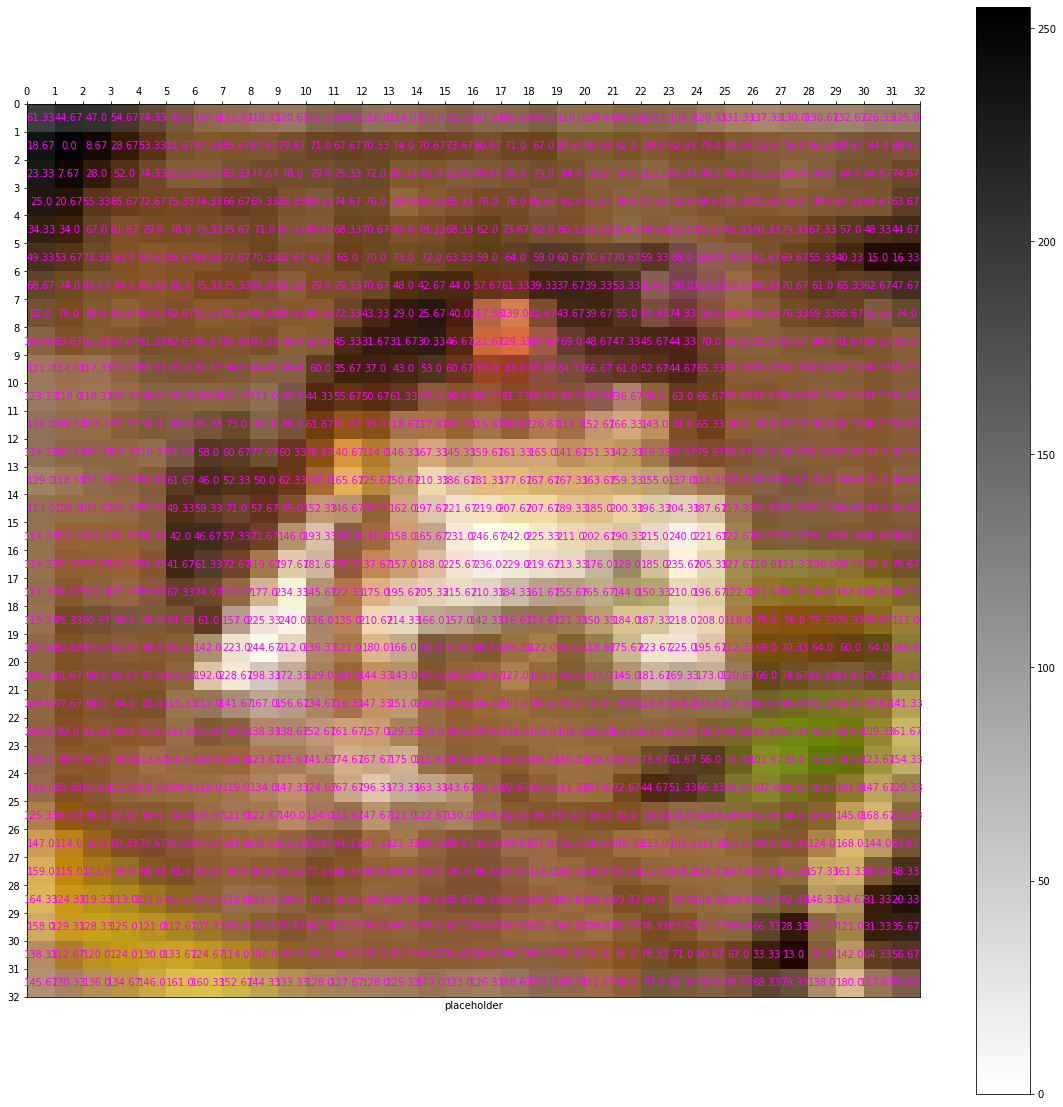

In [ ]:
from numpy.lib.function_base import average
#pixel visualization
index = 0
plt.figure(figsize=(20, 20))
plt.imshow(trainX[index], cmap=plt.cm.binary)
plt.xlabel("placeholder") #class_names[trainy[index]]
plt.colorbar()
# plt.grid(True)

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 32, 1))
ax.set_yticks(np.arange(-.5, 32, 1))
ax.set_xticklabels(np.arange(0, 33, 1))
ax.set_yticklabels(np.arange(0, 33, 1))
ax.xaxis.tick_top()

# Adds Pixel Values on top of image
for i in range(32):
  for j in range(32):
    text = ax.text(j, i, round(average(trainX[index][i, j]), 2), ha="center", va="center", color="fuchsia")    

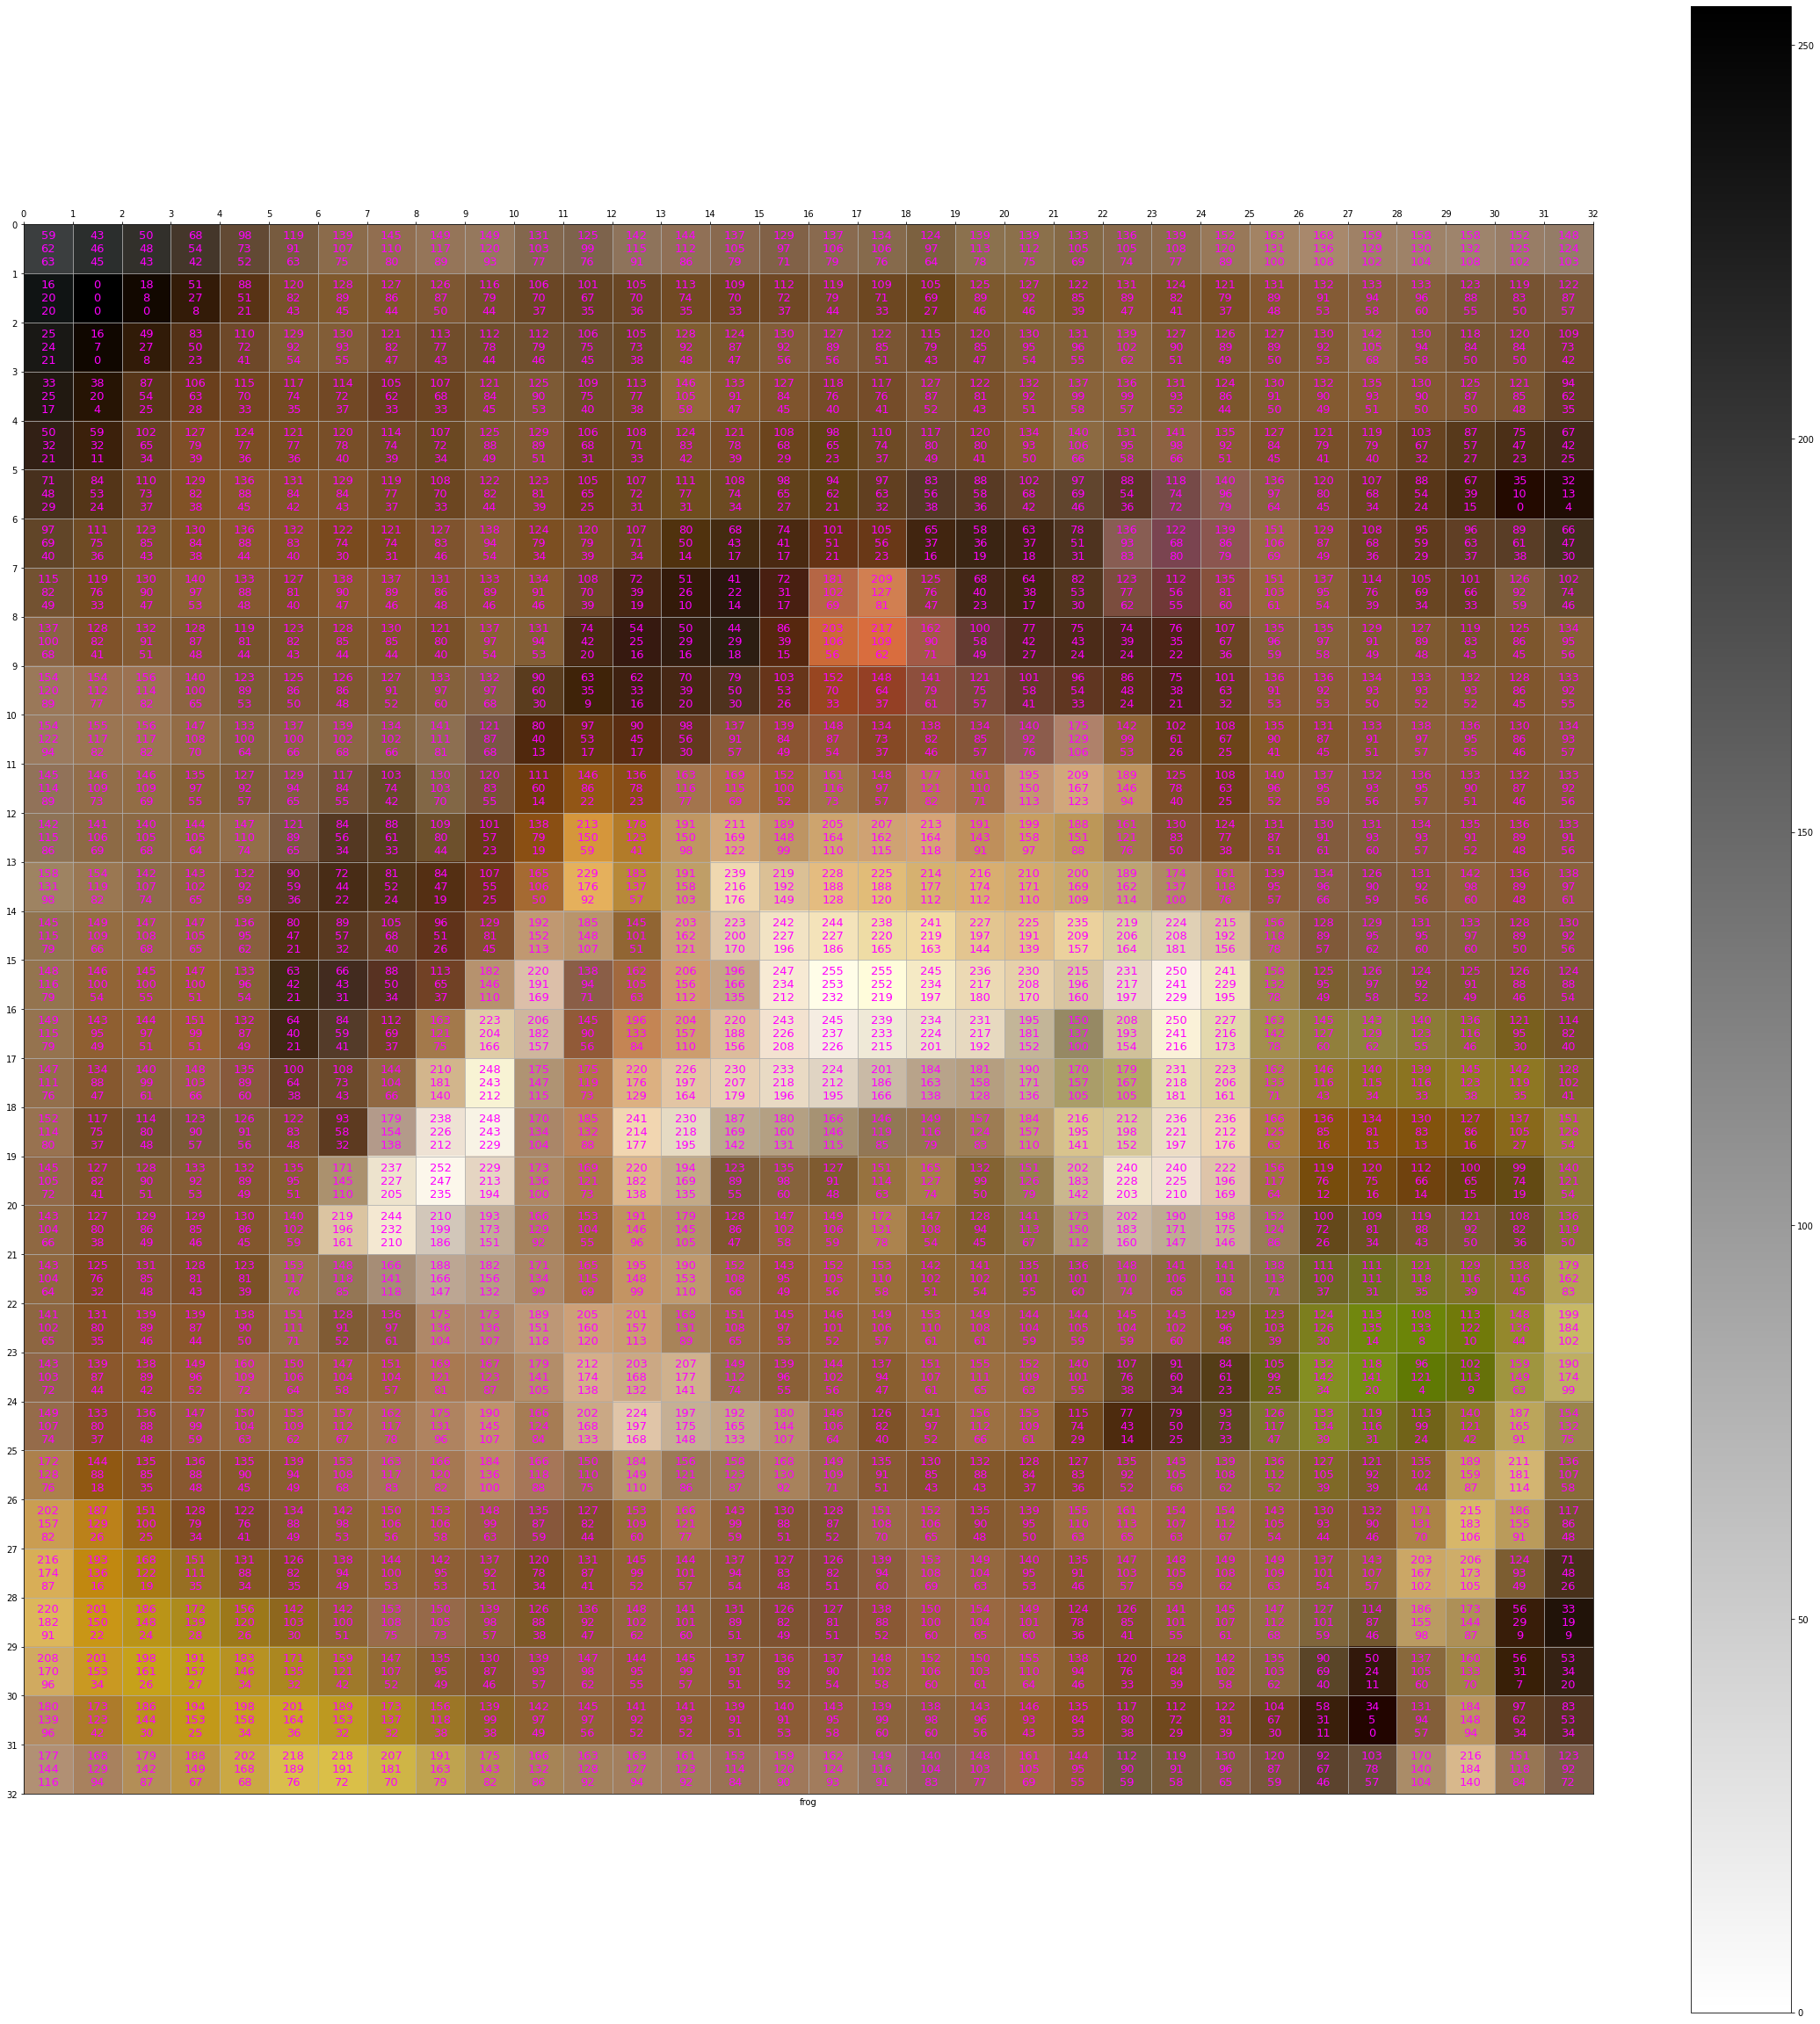

In [ ]:

class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'boat', 'truck']
index = 0
plt.figure(figsize=(40, 42))
plt.imshow(trainX[index], cmap=plt.cm.binary)
plt.xlabel(class_names[trainy[index][0]])
plt.colorbar()
plt.grid(True)

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 32, 1))
ax.set_yticks(np.arange(-.5, 32, 1))
ax.set_xticklabels(np.arange(0, 33, 1))
ax.set_yticklabels(np.arange(0, 33, 1))
ax.xaxis.tick_top()

# Adds Pixel Values on top of image
for i in range(32):
  for j in range(32):
      pixelarr = np.round(trainX[index][i, j], 2)
      strpixel = "\n"
      for val in pixelarr:
        strpixel = strpixel + str(val) + "\n"
      text = ax.text(j, i, strpixel, ha="center", va="center", color="fuchsia", fontsize = 13)        
        
plt.show()

## Baseline Model

Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

Examples:
- You can build a simple neural network model to predict one class. 


Build a simple CNN (one convolutional layer, one maxpooling layer, just like code walkthrough).

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Flatten())    
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)

# Display a summary of the models structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(
    
      # Training data : features (images) and classes.
      trainX, trainy,
                    
      # number of samples to work through before updating the 
      # internal model parameters via back propagation.
      batch_size=256, 

      # An epoch is an iteration over the entire training data.
      epochs=10, 

      # The model will set apart his fraction of the training 
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of 
      # each epoch. 
      validation_split=0.2, 

      verbose=1) 

Epoch 1/10
157/157 [==============================] - 15s 15ms/step - loss: 1.7884 - accuracy: 0.3721 - val_loss: 1.6007 - val_accuracy: 0.4472
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 1.4890 - accuracy: 0.4884 - val_loss: 1.4371 - val_accuracy: 0.5069
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 1.3603 - accuracy: 0.5320 - val_loss: 1.3411 - val_accuracy: 0.5417
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 1.2716 - accuracy: 0.5621 - val_loss: 1.3138 - val_accuracy: 0.5430
Epoch 5/10
157/157 [==============================] - 2s 11ms/step - loss: 1.2137 - accuracy: 0.5844 - val_loss: 1.2367 - val_accuracy: 0.5772
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 1.1713 - accuracy: 0.5998 - val_loss: 1.2125 - val_accuracy: 0.5864
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 1.1440 - accuracy: 0.6068 - val_loss: 1.2332 - val_accuracy: 0.576

313/313 - 1s - loss: 1.1395 - accuracy: 0.6024 - 926ms/epoch - 3ms/step


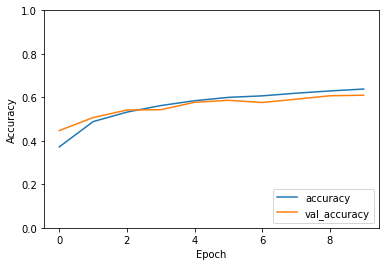

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) # recall accuracy is between 0 to 1
plt.legend(loc='lower right') # specify location of the legend

test_loss, test_acc = model.evaluate(testX, testy, verbose=2)

## Advanced Model

With the knowledge from the baseline model, your team and the instructor can work together to develop advanced models. Advanced models can have the following impact:

- higher accuracy (we usually refer to test set performance and advanced models should have higher performance in the test set than baseline models)
- auto-tune (some advanced model can be due to more automatic tuning procedure, this means the advanced model is a function instead of a fixed model)

Examples: 
- Build a model that is more complex or can improve upon your predictions for classification.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers

In [ ]:
model = Sequential()
weight_decay = 0.0005

# regularizer.l2
# BatchNormalization
# Dropout

model.add(Conv2D(64, (3, 3), padding='same',
                    input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(2048))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Dropout(0.1))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)

# Display a summary of the models structure
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                      

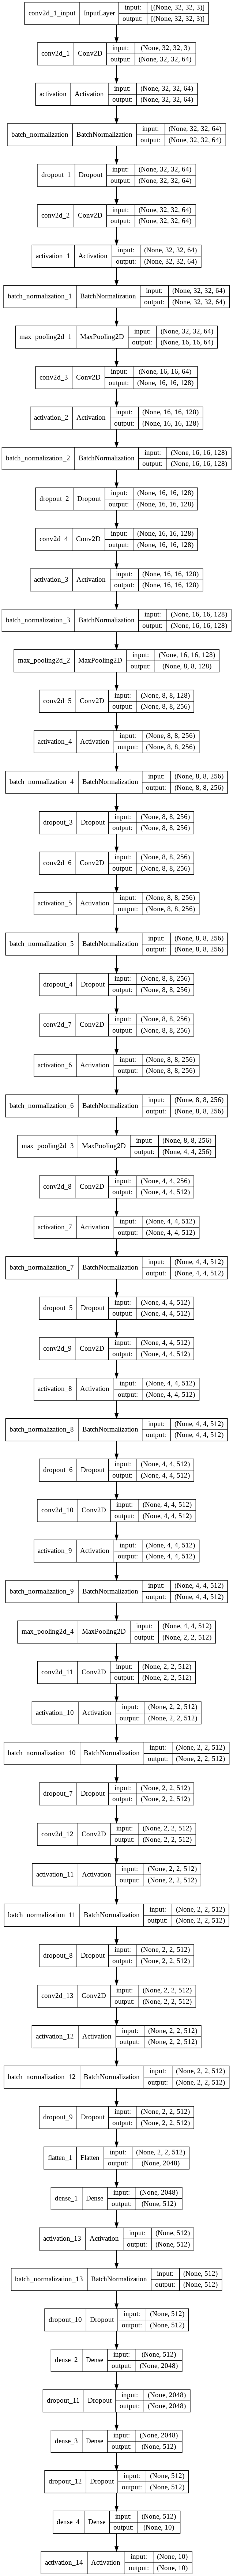

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
def gpu():
    with tf.device('/device:GPU:0'): # with function necessary to run a function because you define gpu device
        # Train the CNN on the training data
        history = model.fit(
            trainX, trainy,
            batch_size=256, 
            epochs=30, 
            validation_split=0.2, 
            verbose=1) 
        return history

In [ ]:
history=gpu()

Epoch 1/30
157/157 [==============================] - 49s 267ms/step - loss: 5.5976 - accuracy: 0.1708 - val_loss: 9.1547 - val_accuracy: 0.1025
Epoch 2/30
157/157 [==============================] - 39s 250ms/step - loss: 4.5775 - accuracy: 0.2465 - val_loss: 5.3067 - val_accuracy: 0.1014
Epoch 3/30
157/157 [==============================] - 39s 250ms/step - loss: 3.9310 - accuracy: 0.3399 - val_loss: 4.5956 - val_accuracy: 0.1860
Epoch 4/30
157/157 [==============================] - 39s 249ms/step - loss: 3.4131 - accuracy: 0.4338 - val_loss: 3.8525 - val_accuracy: 0.2710
Epoch 5/30
157/157 [==============================] - 39s 250ms/step - loss: 2.9561 - accuracy: 0.5245 - val_loss: 3.2328 - val_accuracy: 0.3982
Epoch 6/30
157/157 [==============================] - 39s 250ms/step - loss: 2.6810 - accuracy: 0.5541 - val_loss: 2.7001 - val_accuracy: 0.4893
Epoch 7/30
157/157 [==============================] - 39s 249ms/step - loss: 2.2625 - accuracy: 0.6346 - val_loss: 2.2064 - val_ac

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) # recall accuracy is between 0 to 1
plt.legend(loc='lower right') # specify location of the legend

test_loss, test_acc = model.evaluate(testX, testy, verbose=2)

In [ ]:
trainy_cat = tf.keras.utils.to_categorical(trainy, 10)
testy_cat = tf.keras.utils.to_categorical(testy, 10)

In [ ]:
from keras import backend as K

In [ ]:
base_model = K.applications.vgg16.VGG16(include_top=False,
    weights='imagenet',
    pooling='max',
    input_shape=(32,32,3) # VGG16 method trained by someone else. Top layer in original model does not fit with our layer
    # 224 != 28
    #weights  is a dataset created by a stanford professor meant to help train a model. 
    # WE don't have to retrain, because the best we van get is to their level. 
    # wE should start from where other researchers started, so that we don't have to laborously retrain.
    # im using an established model(VGG16, and using my knowledge to )
)

In [ ]:
model = K.Sequential()
model.add(base_model)
model.add(K.layers.Flatten())
model.add(K.layers.Dense(512, activation=('relu')))
model.add(K.layers.Dropout(0.6))
model.add(K.layers.Dense(256, activation=('relu')))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.Dense(64, activation=('relu')))
model.add(K.layers.Dropout(0.3))
model.add(K.layers.Dense(10, activation=('softmax')))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
history = gpu()
# 30 epochs, b_s 512, vsplit 0.2
 #(Vgg16,512,0.6,256,0.5,64,0.3,10) - > 0.8
 #VGG16 + (512,256,64,10) | 80%
 #(Vgg16,2048,0.6,512,0.4,256,0.4,64,0.3,10) - > 0.8
 #VGG16 + (2048,512,256,64,10) | 80%
 #(Resnet50,2048,0.6,512,0.4,256,0.4,64,0.3,10) - > 0.65
 #Resnet50 + (2048,512,256,64,10) | 65%

# 60 epochs, b_s 256, vsplit 0.2
 #(Resnet50,2048,0.7,512,0.5,256,0.5,64,0.3,10) - > 0.74
 #Resnet50 + (2048,512,256,64,10) | 74%
# 60 epochs, b_s 512, vsplit 0.2
 #(Resnet50,2048,0.6,512,0.4,256,0.4,128,0.3,10) - > 0.79
 #Resnet50 + (2048,512,256,128,10) | 79%
 
 #(Resnet50,2048,0.8,512,0.5,256,0.5,128,0.3,10) - > 0.80

## Model Tuning

Recall in Week 5, we discussed hyperparameters tuning. You can refer to this code [here](https://colab.research.google.com/drive/1BdW6zSQ2XAUcLI83CANcFBQaBw5WgepK).

## Performance Summary

Make a presentation of your result. You can refer to the syntax below.

Markdown | Preview
--- | ---
`**Model 1**` | **Model 2**
`*70%*` or `_italicized text_` | *90%*
`` `Monospace` `` | `Monospace`
`~~strikethrough~~` | ~~strikethrough~~
`[A link](https://www.google.com)` | [A link](https://www.google.com)
`![An image](https://www.google.com/images/rss.png)` | ![An image](https://www.google.com/images/rss.png)

More resources about creating tables in markdown of colab can be found [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk).

## Interpretation and Future Work

Present and also interpret your experimental performance. Comment on potential future work or research questions that your project leads to.

## Reference

We encourage you directly cite or source anything we discussed in the lectures, code walk-throughs, and small group sessions. You are also welcome to cite or use anything you can search from the internet!

For your convenience, we list all the links of the code walk-through in the following:
- [Intro to Basic Python](https://colab.research.google.com/drive/1q2KrXP8DXoL_VN2ceu_Y6tCH5dIl1ScT)
- [Numpy, Pandas, Matplotlib](https://colab.research.google.com/drive/1w-zl871maIQMq1LJmEJUkWj3_uJYlRwE)
- [Basics in Linear Regression](https://colab.research.google.com/drive/1MRMmEjKmBsa1mbJoNxcIENU-bnmyTruJ)
- [Basics in Logistic Regression](https://colab.research.google.com/drive/1Cf-toqVXcx97io4GTHKpYfT9Q0sp1Qts)
- [Intro to Neural Networks](https://colab.research.google.com/drive/1XOkOtMuEaOYYrDVPl9FcYE3xhTeP1c4V)
- [More in Neural Networks](https://colab.research.google.com/drive/1BdW6zSQ2XAUcLI83CANcFBQaBw5WgepK)